In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas.io.sql as sqlio
import psycopg2

In [11]:
host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net'
port=6432
dbname='hr-analytics'
username='analytics'
pwd='HRanalytics'

In [12]:
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "select Id, created_at, delivery_window_id, item_total, promo_total, \
    cost, total_cost, ship_address_id, shipped_at, state, store_id, \
    total_quantity, total_weight, user_id from orders;"
orders = sqlio.read_sql_query(sql, conn)
conn = None

In [13]:
orders.head(2)

,id,created_at,delivery_window_id,item_total,promo_total,cost,total_cost,ship_address_id,shipped_at,state,store_id,total_quantity,total_weight,user_id
0,756927,2018-08-26 02:06:55,226459,5015,0.0,0.0,0.0,888330,2018-08-26 15:01:42,shipped,1,39,37708,139676
1,756963,2018-08-26 05:43:20,226460,7096,0.0,0.0,0.0,888394,2018-08-26 16:28:41,shipped,1,71,49435,139682


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720433 entries, 0 to 720432
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  720433 non-null  int64         
 1   created_at          720433 non-null  datetime64[ns]
 2   delivery_window_id  720433 non-null  int64         
 3   item_total          720433 non-null  int64         
 4   promo_total         720433 non-null  float64       
 5   cost                720433 non-null  float64       
 6   total_cost          720433 non-null  float64       
 7   ship_address_id     720433 non-null  int64         
 8   shipped_at          720433 non-null  datetime64[ns]
 9   state               720433 non-null  object        
 10  store_id            720433 non-null  int64         
 11  total_quantity      720433 non-null  int64         
 12  total_weight        720433 non-null  int64         
 13  user_id             720433 no

In [15]:
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "select id, starts_at, ends_at, store_id from delivery_windows;"
delivery_windows = sqlio.read_sql_query(sql, conn)
conn = None

In [448]:
delivery_windows = delivery_windows.rename(columns={'id' : 'delivery_window_id'})

In [449]:
delivery_windows.head(2)

,delivery_window_id,starts_at,ends_at,store_id,time
0,226459,2018-08-26 14:00:00,2018-08-26 16:00:00,1,14
1,226460,2018-08-26 15:00:00,2018-08-26 17:00:00,1,15


In [17]:
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "select id, city, retailer_id from stores;"
stores = sqlio.read_sql_query(sql, conn)
conn = None

In [18]:
stores = stores.rename(columns={'id' : 'store_id'})

In [19]:
stores.head(2)

,store_id,city,retailer_id
0,1,1,1
1,2,1,1


In [20]:
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "select id, lat, lon from addresses;"
addresses = sqlio.read_sql_query(sql, conn)
conn = None

In [21]:
addresses.head(2)

,id,lat,lon
0,887760,55.851604,37.634282
1,888330,55.855683,37.644165


In [22]:
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "select item_id, order_id, state from replacements;"
replacements = sqlio.read_sql_query(sql, conn)
conn = None

In [23]:
replacements = replacements.rename(columns = {'order_id' : 'id'})

In [24]:
replacements.head(2)

,item_id,id,state
0,6466916,480785,replaced
1,6466940,480785,replaced


In [25]:
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "select item_id, order_id, state from cancellations;"
cancellations = sqlio.read_sql_query(sql, conn)
conn = None

In [26]:
cancellations = cancellations.rename(columns={'order_id' : 'id'})

In [27]:
cancellations.head(2)

,item_id,id,state
0,5333890,480443,canceled
1,5333777,480443,canceled


In [28]:
orders.shape

(720433, 14)

In [29]:
orders.dtypes

id                             int64
created_at            datetime64[ns]
delivery_window_id             int64
item_total                     int64
promo_total                  float64
cost                         float64
total_cost                   float64
ship_address_id                int64
shipped_at            datetime64[ns]
state                         object
store_id                       int64
total_quantity                 int64
total_weight                   int64
user_id                        int64
dtype: object

In [30]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [31]:
orders.describe()

,id,delivery_window_id,item_total,promo_total,cost,total_cost,ship_address_id,store_id,total_quantity,total_weight,user_id
count,720433.00,720433.00,720433.00,720433.00,720433.00,720433.00,720433.00,720433.00,720433.00,720433.00,720433.00
mean,2747199.87,690512.35,4936.18,-51.43,252.46,171.82,3477355.72,50.90,42.92,24586.78,638548.88
std,1446097.72,215626.66,4801.75,234.26,144.19,152.64,1832336.79,56.70,79.49,33129.88,540511.21
min,756914.00,226458.00,0.00,-39899.30,0.00,-148.00,6017.00,1.00,0.00,0.00,31.00
25%,1496435.00,523730.00,2673.00,0.00,199.00,98.00,1861411.00,9.00,20.00,10431.00,186706.00
50%,2423437.00,736147.00,3964.00,0.00,249.00,158.00,3190749.00,14.00,32.00,18000.00,363085.00
75%,4129816.00,880331.00,5918.00,0.00,299.00,263.00,5123160.00,90.00,50.00,29900.00,1129740.00
max,5444849.00,1242161.00,481195.00,0.00,30000.00,30000.00,7146722.00,317.00,36040.00,7005600.00,1837484.00


In [32]:
users_purchases = orders.groupby('user_id', as_index = False) \
    .agg({'id' : 'count'}) \
    .rename(columns={'id' : 'purchases'})

In [33]:
users_purchases.describe()

,user_id,purchases
count,257827.00,257827.00
mean,835315.09,2.79
std,576788.45,5.17
min,31.00,1.00
25%,265205.50,1.00
50%,791629.00,1.00
75%,1365612.50,3.00
max,1837484.00,493.00


In [34]:
#производились ли замены/отмены товаров у пользователей, совершивших 1 заказ (медиана - 1 заказ)
#группа пользователей с максимальным количеством заказов (максимум - 493 заказа)
#доля заказов с промокодами
#замена товаров и отмена заказов у пользователей с 1 заказом
#поиск взаимосвязей с помощью корреляции в части рителейлеров
#выбранное окно доставки и фактическая доставка

In [35]:
retailer = orders[['id', 'created_at', 'store_id', 'total_quantity', 'user_id']] \
    .merge(stores, on='store_id', how='inner')

In [36]:
retailer.head()

,id,created_at,store_id,total_quantity,user_id,city,retailer_id
0,756927,2018-08-26 02:06:55,1,39,139676,1,1
1,756963,2018-08-26 05:43:20,1,71,139682,1,1
2,756983,2018-08-26 06:12:13,1,32,63967,1,1
3,756985,2018-08-26 06:13:59,1,13,139687,1,1
4,757066,2018-08-26 07:40:58,1,24,119006,1,1


In [37]:
retailer['date'] = retailer['created_at'].dt.date

In [38]:
retailer.head()

,id,created_at,store_id,total_quantity,user_id,city,retailer_id,date
0,756927,2018-08-26 02:06:55,1,39,139676,1,1,2018-08-26
1,756963,2018-08-26 05:43:20,1,71,139682,1,1,2018-08-26
2,756983,2018-08-26 06:12:13,1,32,63967,1,1,2018-08-26
3,756985,2018-08-26 06:13:59,1,13,139687,1,1,2018-08-26
4,757066,2018-08-26 07:40:58,1,24,119006,1,1,2018-08-26


In [39]:
retailer_purchases = retailer.groupby('city', as_index = False) \
    .agg({'id' : 'count'}) \
    .rename(columns = {'id' : 'purchases'}) \
    .sort_values('purchases', ascending = False)

In [40]:
retailer_purchases

,city,purchases
0,1,478861
3,7,76360
5,10,46789
1,2,39784
2,5,29386
4,8,28677
6,13,20576


In [41]:
#взаимное влияние ритейлеров в городе 1 с наибольшим количеством заказов

In [42]:
retailer_city1 = retailer.query('city == 1') \
    .groupby(['user_id', 'date', 'retailer_id'], as_index = False) \
    .agg({'id' : 'count'}) \
    .rename(columns = {'id' : 'purchases'})

In [43]:
retailer_city1.head()

,user_id,date,retailer_id,purchases
0,31,2018-09-04,1,1
1,31,2018-09-06,1,1
2,31,2018-09-21,1,1
3,31,2018-09-23,1,2
4,31,2018-10-17,1,1


In [44]:
sparse_retailer = pd.pivot_table(retailer_city1, values = 'purchases',
                                index=['date', 'user_id'],
                                columns=['retailer_id'],
                                fill_value=0,
                                aggfunc = lambda x: x)

In [45]:
sparse_retailer.head()

retailer_id         1   8   15  16
date       user_id                
2018-08-26 167       1   0   0   0
           912       1   0   0   0
           2109      1   0   0   0
           3221      1   0   0   0
           4225      1   0   0   0

In [46]:
retailer_corr = sparse_retailer.corr()

In [47]:
retailer_corr

retailer_id,1,8,15,16
retailer_id,,,,
1,1.00,-0.14,-0.80,-0.19
8,-0.14,1.00,-0.01,-0.00
15,-0.80,-0.01,1.00,-0.02
16,-0.19,-0.00,-0.02,1.00


In [48]:
#покупки у ритейлера 1 отрицательно влияют на покупки у ритейлера 15 
#в городе 1 с наибольшим количеством заказов это основные конкуренты
#с ростом значений одной переменной значения другой переменной уменьшаются

In [49]:
cancelled_items = orders[['id', 'user_id', 'total_quantity']] \
    .merge(cancellations, on = 'id', how = 'outer') \
    .groupby(['id', 'user_id', 'total_quantity'], as_index = False) \
    .agg({'item_id' : 'count'}) \
    .rename(columns = {'item_id' : 'cancelled_quantity'})

In [50]:
cancelled_items['rate'] = cancelled_items['cancelled_quantity'] / cancelled_items['total_quantity']

In [51]:
cancelled_items = cancelled_items.replace(np.inf, 100).dropna()

In [52]:
user_purchases_cancelled_items = cancelled_items.groupby('user_id', as_index = False) \
    .agg({'id' : 'count', 'rate' : 'mean'}) \
    .rename(columns = {'id' : 'purchases'})

In [53]:
user_purchases_cancelled_items

,user_id,purchases,rate
0,31.00,41,0.04
1,45.00,31,0.12
2,63.00,1,0.06
3,167.00,37,0.07
4,176.00,1,0.00
...,...,...,...
257817,1837005.00,1,0.00
257818,1837043.00,1,0.14
257819,1837423.00,1,0.07
257820,1837462.00,1,0.25


<AxesSubplot:xlabel='rate', ylabel='purchases'>

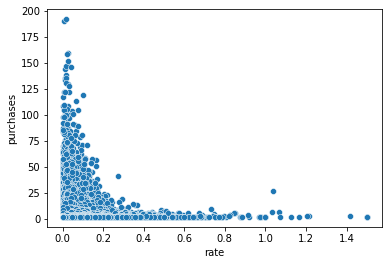

In [54]:
sns.scatterplot(x='rate', y='purchases', 
                data=user_purchases_cancelled_items.query('rate < 2 and purchases > 1 and purchases < 200'))

In [55]:
#пользователи проявляют лояльность к сервису и совершают покупки повторно
#если в заказах доля отмененных товаров менее 1%
#заметный рост лояльности с отметки менее 0,25% (99,75% товаров в наличии и соответствуют качеству на момент сборки заказа)

Text(0.5, 1.0, 'Correlation Heatmap')

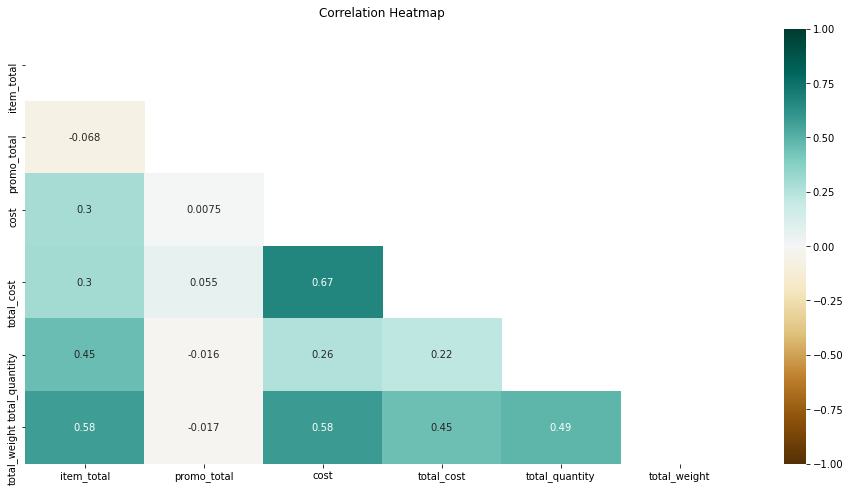

In [56]:
plt.figure(figsize = (16, 8))
matrix = np.triu(orders[['item_total', 'promo_total', 'cost', 'total_cost', 'total_quantity', 'total_weight']].corr())
sns.heatmap(orders[['item_total', 'promo_total', 'cost', 'total_cost', 'total_quantity', 'total_weight']] \
            .corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=matrix) \
            .set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [57]:
#сила связи по модулю:
#до 0,29 — слабая 
#до 0,69 — средняя 
#до 0,99 — сильная 
#направление связи:
#зеленый - изменение признаков происходит в одном направлении (прямая)
#коричнеый - изменение признаков происходит в разных направлениях (обратная)

#связь суммы промо-кода на товары в корзине с количеством единиц товара в заказе слабая

In [115]:
orders_pivot = orders.pivot_table(values=['item_total', 'total_quantity'], index=['cost', 'promo_total'], aggfunc='median')

<AxesSubplot:xlabel='total_quantity', ylabel='promo_total'>

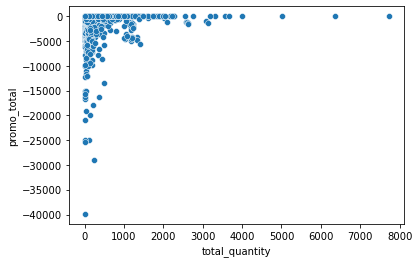

In [119]:
sns.scatterplot(x='total_quantity', y='promo_total', data=orders_pivot)

In [120]:
orders_with_promo = orders.query('promo_total < 0').groupby('user_id', as_index = False) \
    .agg({'id' : 'count'}) \
    .sort_values('id') \
    .rename(columns={'id' : 'orders_with_promo'})

In [121]:
orders_with_promo

,user_id,orders_with_promo
0,45,1
45164,967591,1
45165,967627,1
45166,967670,1
45167,967687,1
...,...,...
20070,272242,40
32935,535160,41
25798,339342,46
4516,129033,211


In [62]:
#совершают ли пользователи следующий заказ после успешного оформленного заказа с промо

In [123]:
orders_without_promo = orders.query('promo_total == 0').groupby('user_id', as_index = False) \
    .agg({'id' : 'count'}) \
    .sort_values('id') \
    .rename(columns={'id' : 'orders_without_promo'})

In [124]:
orders_without_promo

,user_id,orders_without_promo
110928,797264,1
130929,1054996,1
130931,1055063,1
130932,1055078,1
130933,1055137,1
...,...,...
44361,224255,230
4254,42230,236
42028,215536,405
2406,25097,422


In [220]:
promo = users_purchases.merge(orders_with_promo, how = 'left').merge(orders_without_promo, how = 'left')

In [221]:
promo.sort_values('purchases')

,user_id,purchases,orders_with_promo,orders_without_promo
128913,791629,1,NaN,1.00
152392,1037408,1,NaN,1.00
152394,1037439,1,NaN,1.00
152395,1037440,1,NaN,1.00
152396,1037441,1,NaN,1.00
...,...,...,...,...
4537,42230,243,7.00,236.00
48877,215536,405,NaN,405.00
2554,25097,422,NaN,422.00
17186,129033,427,211.00,216.00


In [222]:
promo['purchases'].value_counts()

1      144659
2       44095
3       21466
4       12822
5        8210
        ...  
144         1
138         1
89          1
192         1
128         1
Name: purchases, Length: 129, dtype: int64

In [223]:
promo.query('purchases == 2')

,user_id,purchases,orders_with_promo,orders_without_promo
16,509,2,NaN,2.00
18,562,2,2.00,NaN
25,642,2,NaN,2.00
32,750,2,NaN,2.00
34,789,2,1.00,1.00
...,...,...,...,...
257161,1831309,2,NaN,2.00
257337,1832556,2,1.00,1.00
257429,1833088,2,NaN,2.00
257433,1833120,2,1.00,1.00


In [229]:
promo.query('purchases == 2').query('orders_with_promo == 2 or orders_with_promo == 1').count()

user_id                 11912
purchases               11912
orders_with_promo       11912
orders_without_promo     8947
dtype: int64

In [230]:
users_2purchases = promo.query('purchases == 2')

In [231]:
first_order_for_users_2purchases = users_2purchases.merge(orders) \
    .sort_values(['user_id', 'id']) \
    .groupby('user_id') \
    .head(1)

In [233]:
first_order_for_users_2purchases.loc[first_order_for_users_2purchases['promo_total'] < 0, 
                                     'promo_total'].count() / users_2purchases['purchases'].count()

0.17448690327701555

In [209]:
retailer_by_city = orders[['user_id', 'store_id']].merge(stores).groupby(['city', 'retailer_id'], as_index=False).count()

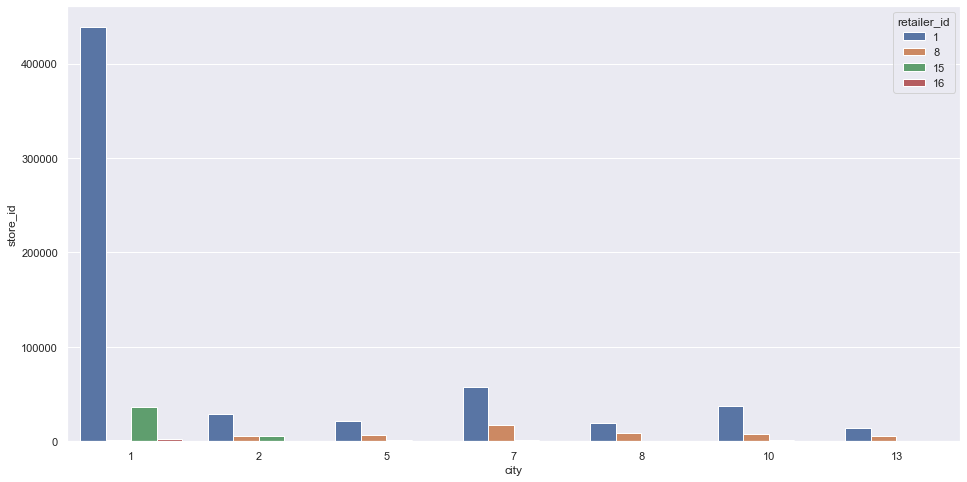

In [235]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x = "city", y = "store_id", hue = "retailer_id", data = retailer_by_city)
plt.show()

In [ ]:
#ритейлер 1 лидер по всем городам

In [251]:
delivery_windows['time'] = delivery_windows['starts_at'].dt.hour

<AxesSubplot:>

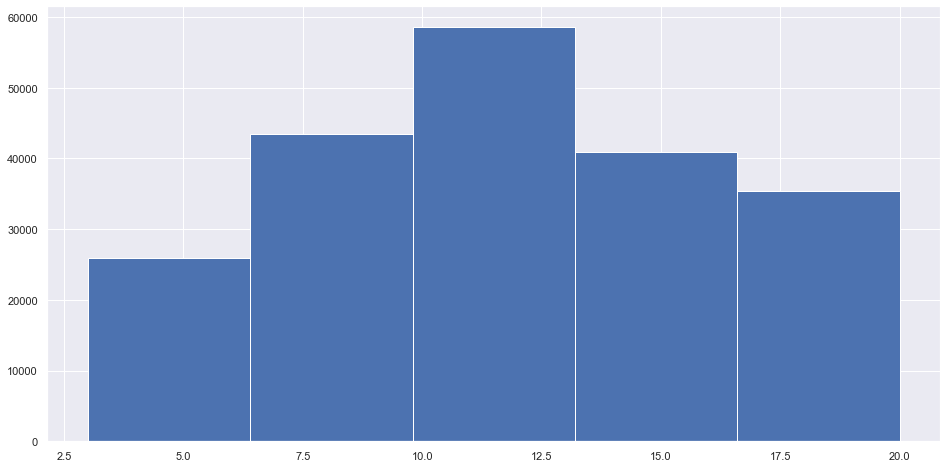

In [260]:
delivery_windows['time'].hist(bins=5)

In [ ]:
#максимальная загрузка на доставку с 10-12 часов

In [291]:
groups = users_purchases.groupby(['user_id', pd.cut(users_purchases['purchases'], [0, 5, 50, 500])])
groups.size().unstack()

purchases,"(0, 5]","(5, 50]","(50, 500]"
user_id,,,
31,0,1,0
45,0,1,0
63,1,0,0
167,0,1,0
176,1,0,0
...,...,...,...
1837005,1,0,0
1837043,1,0,0
1837423,1,0,0


In [303]:
groups.size().unstack().value_counts()

(0, 5]  (5, 50]  (50, 500]
1       0        0            231252
0       1        0             26196
        0        1               379
dtype: int64

In [340]:
users_purchases.query('purchases >= 5').sum() / users_purchases.query('purchases < 5').sum()

user_id     0.10
purchases   1.07
dtype: float64

In [347]:
users_purchases.query('purchases >= 5').user_id.count() / users_purchases.query('purchases < 5').user_id.count()

0.1559571739851687

In [ ]:
#половина всех заказов совершена пользователями, оформивших их более 5 раз
#что составляет 15% от всех пользователей
#заказы, оформленные 15% лояльных пользователей, составляют половину всех заказов

In [350]:
users_purchases.query('purchases > 400')

,user_id,purchases
2554,25097,422
6525,56017,493
17186,129033,427
48877,215536,405


In [ ]:
#4 пользователя совершают максимальное количество покупок
#пользователь с максимальным количеством заказов совершает их в 7 городах у разных ритейлеров
#три других совершают заказы в городе 1 у ритейлера 1

In [385]:
max_purchases = orders.query('user_id == 25097 or user_id == 56017 or user_id == 129033 or user_id == 215536') \
    .groupby(['user_id', 'store_id'], as_index = False).agg({'id' : 'count'}) \
    .merge(stores) \
    .rename(columns = {'id' : 'purchases'})

In [390]:
pd.pivot_table(max_purchases, values='purchases', index=['user_id', 'city', 'retailer_id'], aggfunc=np.sum)

purchases
user_id city retailer_id           
25097   1    1                  422
56017   1    1                  352
             8                    1
             15                   3
        2    1                   27
             8                    4
             15                   1
        5    1                   20
             8                    1
        7    1                   17
             8                    1
        8    1                   19
             8                    5
        10   1                   22
             8                    7
        13   1                   13
129033  1    1                  427
215536  1    1                  405

In [360]:
orders[['user_id', 'item_total']].sort_values('item_total', ascending = False).head(10).groupby('user_id').count()

,item_total
user_id,
171371,4
182865,1
526921,1
537166,1
1181022,1
1230421,1
1673764,1


In [ ]:
#из топ-10 заказов с максимальным средним чеком, 4 совершены user_id=171371

In [418]:
users_purchase1 = users_purchases.query('purchases == 1').merge(orders[['user_id', 'id', 'total_quantity']]) \
    .merge(replacements, how = 'left') \
    .rename(columns = {'item_id' : 'item_id_repl', 'state' : 'state_repl'}) \
    .merge(cancellations, how = 'left') \
    .rename(columns = {'item_id' : 'item_id_canc', 'state' : 'state_canc'}) \
    .groupby(['user_id', 'id'], as_index = False) \
    .agg({'purchases' : 'mean', 'total_quantity' : 'mean', 'item_id_repl' : 'count', 'item_id_canc' : 'count'})

In [423]:
users_purchase1

,user_id,id,purchases,total_quantity,item_id_repl,item_id_canc
0,63,809314,1,18,0,1
1,176,1219633,1,20,0,0
2,194,817910,1,45,0,0
3,240,4748488,1,28,4,4
4,380,1149984,1,49,6,6
...,...,...,...,...,...,...
144654,1837005,5441910,1,17,3,0
144655,1837043,5441436,1,14,0,2
144656,1837423,5442283,1,14,2,2
144657,1837462,5443574,1,28,28,28


In [425]:
users_purchase1.query('item_id_repl == 0 and item_id_canc == 0')

,user_id,id,purchases,total_quantity,item_id_repl,item_id_canc
1,176,1219633,1,20,0,0
2,194,817910,1,45,0,0
5,538,833157,1,8,0,0
6,566,1637244,1,72,0,0
13,807,1690760,1,10,0,0
...,...,...,...,...,...,...
144621,1835972,5438231,1,30,0,0
144625,1836030,5438377,1,39,0,0
144642,1836388,5439632,1,19,0,0
144650,1836756,5440635,1,16,0,0


In [499]:
(144659 - 39369) / 144659 * 100

72.78496325842153

In [ ]:
#73% пользователей, совершивших одну покупку, столкнулись с заменой или исключением товара из заказа

In [451]:
delivery = orders[['id', 'created_at', 'delivery_window_id', 'store_id', 'shipped_at']] \
    .merge(delivery_windows[['delivery_window_id', 'starts_at', 'ends_at']]) \
    .merge(stores)

In [452]:
delivery['delta_start'] = delivery['shipped_at'] - delivery['starts_at']
delivery['delta_end'] = delivery['ends_at'] - delivery['shipped_at']

In [459]:
delivery['check'] = np.logical_and(delivery['starts_at'] < delivery['shipped_at'], 
                                   delivery['shipped_at'] < delivery['ends_at'])

In [484]:
delivery['delta_hours'] = delivery['delta_start'] / np.timedelta64(1, 'h')

In [494]:
delivery.query('check == 0').sort_values(['delta_start', 'delta_end'], ascending = False)

,id,created_at,delivery_window_id,store_id,shipped_at,starts_at,ends_at,city,retailer_id,delta_start,delta_end,check,delta_hours
387630,1051270,2019-01-11 21:28:47,364583,21,2019-03-20 12:20:36,2019-01-12 17:00:00,2019-01-12 19:00:00,1,1,66 days 19:20:36,-67 days +06:39:24,False,1603.34
203340,1060594,2019-01-16 07:51:36,370868,10,2019-03-20 12:20:37,2019-01-18 09:00:00,2019-01-18 11:00:00,1,1,61 days 03:20:37,-62 days +22:39:23,False,1467.34
248972,1259823,2019-04-04 13:04:17,472809,11,2019-06-14 09:38:23,2019-04-19 09:00:00,2019-04-19 11:00:00,1,1,56 days 00:38:23,-56 days +01:21:37,False,1344.64
284209,1091202,2019-01-28 11:17:34,383823,12,2019-03-20 12:20:35,2019-01-30 11:00:00,2019-01-30 13:00:00,1,1,49 days 01:20:35,-49 days +00:39:25,False,1177.34
139094,1112600,2019-02-04 12:39:39,391438,8,2019-03-20 12:20:36,2019-02-06 06:00:00,2019-02-06 08:00:00,1,1,42 days 06:20:36,-43 days +19:39:24,False,1014.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246204,1091656,2019-01-28 13:57:43,404593,11,2019-01-28 18:03:00,2019-02-18 13:00:00,2019-02-18 21:00:00,1,1,-21 days +05:03:00,21 days 02:57:00,False,-498.95
704361,2047177,2019-08-21 04:08:07,726291,108,2019-08-21 08:11:28,2019-09-20 09:00:00,2019-09-20 11:00:00,13,1,-31 days +23:11:28,30 days 02:48:32,False,-720.81
139692,1135002,2019-02-14 15:35:05,443615,8,2019-02-21 10:23:00,2019-03-25 13:00:00,2019-03-25 15:00:00,1,1,-33 days +21:23:00,32 days 04:37:00,False,-770.62
426130,1324110,2019-04-22 13:05:43,524878,68,2019-04-25 10:04:08,2019-05-29 06:00:00,2019-05-29 08:00:00,1,1,-34 days +04:04:08,33 days 21:55:52,False,-811.93


In [493]:
delivery.query('check == 0').sort_values(['delta_start', 'delta_end'], ascending = False).query('delta_hours > 24')

,id,created_at,delivery_window_id,store_id,shipped_at,starts_at,ends_at,city,retailer_id,delta_start,delta_end,check,delta_hours
387630,1051270,2019-01-11 21:28:47,364583,21,2019-03-20 12:20:36,2019-01-12 17:00:00,2019-01-12 19:00:00,1,1,66 days 19:20:36,-67 days +06:39:24,False,1603.34
203340,1060594,2019-01-16 07:51:36,370868,10,2019-03-20 12:20:37,2019-01-18 09:00:00,2019-01-18 11:00:00,1,1,61 days 03:20:37,-62 days +22:39:23,False,1467.34
248972,1259823,2019-04-04 13:04:17,472809,11,2019-06-14 09:38:23,2019-04-19 09:00:00,2019-04-19 11:00:00,1,1,56 days 00:38:23,-56 days +01:21:37,False,1344.64
284209,1091202,2019-01-28 11:17:34,383823,12,2019-03-20 12:20:35,2019-01-30 11:00:00,2019-01-30 13:00:00,1,1,49 days 01:20:35,-49 days +00:39:25,False,1177.34
139094,1112600,2019-02-04 12:39:39,391438,8,2019-03-20 12:20:36,2019-02-06 06:00:00,2019-02-06 08:00:00,1,1,42 days 06:20:36,-43 days +19:39:24,False,1014.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470712,5106745,2019-12-10 11:37:19,949832,185,2019-12-13 10:00:54,2019-12-12 10:00:00,2019-12-12 12:00:00,1,15,1 days 00:00:54,-1 days +01:59:06,False,24.02
464132,4983521,2019-12-07 12:38:59,949681,177,2019-12-13 10:00:28,2019-12-12 10:00:00,2019-12-12 12:00:00,1,15,1 days 00:00:28,-1 days +01:59:32,False,24.01
284763,1079869,2019-01-23 17:13:06,377371,12,2019-01-25 06:00:25,2019-01-24 06:00:00,2019-01-24 08:00:00,1,1,1 days 00:00:25,-1 days +01:59:35,False,24.01
8530,1080087,2019-01-23 19:10:38,377245,1,2019-01-25 06:00:23,2019-01-24 06:00:00,2019-01-24 08:00:00,1,1,1 days 00:00:23,-1 days +01:59:37,False,24.01


In [464]:
delivery.query('check == 1')

,id,created_at,delivery_window_id,store_id,shipped_at,starts_at,ends_at,city,retailer_id,delta_start,delta_end,check
0,756927,2018-08-26 02:06:55,226459,1,2018-08-26 15:01:42,2018-08-26 14:00:00,2018-08-26 16:00:00,1,1,0 days 01:01:42,0 days 00:58:18,True
1,756983,2018-08-26 06:12:13,226459,1,2018-08-26 15:09:11,2018-08-26 14:00:00,2018-08-26 16:00:00,1,1,0 days 01:09:11,0 days 00:50:49,True
2,756963,2018-08-26 05:43:20,226460,1,2018-08-26 16:28:41,2018-08-26 15:00:00,2018-08-26 17:00:00,1,1,0 days 01:28:41,0 days 00:31:19,True
3,756985,2018-08-26 06:13:59,226462,1,2018-08-26 18:57:01,2018-08-26 17:00:00,2018-08-26 19:00:00,1,1,0 days 01:57:01,0 days 00:02:59,True
4,757066,2018-08-26 07:40:58,226458,1,2018-08-26 13:46:48,2018-08-26 13:00:00,2018-08-26 15:00:00,1,1,0 days 00:46:48,0 days 01:13:12,True
...,...,...,...,...,...,...,...,...,...,...,...,...
720423,5407098,2019-12-17 19:19:15,973243,235,2019-12-18 04:12:12,2019-12-18 03:00:00,2019-12-18 05:00:00,13,15,0 days 01:12:12,0 days 00:47:48,True
720424,5402852,2019-12-17 17:19:32,973250,235,2019-12-18 11:36:41,2019-12-18 10:00:00,2019-12-18 12:00:00,13,15,0 days 01:36:41,0 days 00:23:19,True
720425,5417362,2019-12-18 06:55:18,973250,235,2019-12-18 10:24:47,2019-12-18 10:00:00,2019-12-18 12:00:00,13,15,0 days 00:24:47,0 days 01:35:13,True
720426,5414391,2019-12-18 05:14:22,973249,235,2019-12-18 10:20:22,2019-12-18 09:00:00,2019-12-18 11:00:00,13,15,0 days 01:20:22,0 days 00:39:38,True


In [490]:
187091 / 533338 * 100

35.079255556513885

In [470]:
#35% заказов доставлены с отклонением от выбранного интервала доставки

In [491]:
614 / 533338 * 100

0.11512399266506418

In [ ]:
#0,1% заказа (> 500шт.) доставлен в другой день

In [496]:
users_purchase1.merge(delivery[['id', 'check']])

,user_id,id,purchases,total_quantity,item_id_repl,item_id_canc,check
0,63,809314,1,18,0,1,True
1,176,1219633,1,20,0,0,True
2,194,817910,1,45,0,0,False
3,240,4748488,1,28,4,4,True
4,380,1149984,1,49,6,6,True
...,...,...,...,...,...,...,...
144652,1837005,5441910,1,17,3,0,False
144653,1837043,5441436,1,14,0,2,True
144654,1837423,5442283,1,14,2,2,True
144655,1837462,5443574,1,28,28,28,False


In [500]:
users_purchase1.merge(delivery[['id', 'check']]).query('check == 0')

,user_id,id,purchases,total_quantity,item_id_repl,item_id_canc,check
2,194,817910,1,45,0,0,False
10,668,856786,1,52,7,7,False
15,939,927446,1,56,0,0,False
20,1195,5422440,1,20,1,1,False
23,1246,4060953,1,41,3,3,False
...,...,...,...,...,...,...,...
144636,1836345,5437168,1,18,3,3,False
144640,1836388,5439632,1,19,0,0,False
144652,1837005,5441910,1,17,3,0,False
144655,1837462,5443574,1,28,28,28,False


In [498]:
39061 / 144657 * 100

27.00249555845898

In [ ]:
#27% пользователей, совершивших одну покупку, получили заказ вне указанного интервала доставки

In [505]:
users_purchase1.query('item_id_repl == 0 and item_id_canc == 0').merge(delivery[['id', 'check']]).query('check == 0')

,user_id,id,purchases,total_quantity,item_id_repl,item_id_canc,check
1,194,817910,1,45,0,0,False
6,939,927446,1,56,0,0,False
9,1251,849184,1,14,0,0,False
15,1726,1286051,1,8,0,0,False
19,2465,4471816,1,26,0,0,False
...,...,...,...,...,...,...,...
39359,1835604,5435595,1,21,0,0,False
39362,1835860,5432638,1,10,0,0,False
39364,1836030,5438377,1,39,0,0,False
39365,1836388,5439632,1,19,0,0,False


In [504]:
39369 / 144659 * 100

27.21503674157847

In [506]:
9605 / 39369 * 100

24.397368487896568

In [ ]:
#24% пользователей, совершвших единственный заказ без замен и отмен на этапе сборки, не получили его в указанное время

In [508]:
orders_per_month = orders[['id', 'created_at']]

In [509]:
orders_per_month['year'] = orders_per_month['created_at'].dt.year
orders_per_month['month'] = orders_per_month['created_at'].dt.month

<ipython-input-509-91d3609f15c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_per_month['year'] = orders_per_month['created_at'].dt.year
<ipython-input-509-91d3609f15c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_per_month['month'] = orders_per_month['created_at'].dt.month


In [521]:
pd.pivot_table(orders_per_month, values='id', index=['year', 'month'], aggfunc=pd.Series.nunique)

id
year month        
2018 8        3236
     9       16711
     10      19426
     11      19810
     12      17287
2019 1       19191
     2       17968
     3       20072
     4       25133
     5       30551
     6       36026
     7       45664
     8       47029
     9       61591
     10      86947
     11     149715
     12     104076

In [524]:
104076 / 3236

32.161928306551296

In [ ]:
#рост количества заказов с 08.2018 по 12.2019 в 30 раз

In [528]:
orders['item_total'].sum()

3556187007

In [530]:
orders['id'].count()

720433

In [532]:
orders['total_quantity'].sum()

30923190

In [534]:
orders['user_id'].nunique()

257827

In [533]:
orders

,id,created_at,delivery_window_id,item_total,promo_total,cost,total_cost,ship_address_id,shipped_at,state,store_id,total_quantity,total_weight,user_id
0,756927,2018-08-26 02:06:55,226459,5015,0.00,0.00,0.00,888330,2018-08-26 15:01:42,shipped,1,39,37708,139676
1,756963,2018-08-26 05:43:20,226460,7096,0.00,0.00,0.00,888394,2018-08-26 16:28:41,shipped,1,71,49435,139682
2,756983,2018-08-26 06:12:13,226459,2724,-250.00,299.00,299.00,888420,2018-08-26 15:09:11,shipped,1,32,11590,63967
3,756985,2018-08-26 06:13:59,226462,3471,0.00,0.00,0.00,888422,2018-08-26 18:57:01,shipped,1,13,9915,139687
4,757066,2018-08-26 07:40:58,226458,1254,0.00,299.00,299.00,870688,2018-08-26 13:46:48,shipped,1,24,15022,119006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720428,5423310,2019-12-18 09:16:28,973254,4777,0.00,258.00,258.00,6346125,2019-12-18 15:45:12,shipped,235,71,43286,1676786
720429,5423488,2019-12-18 09:20:18,973253,1864,0.00,238.00,98.00,7120759,2019-12-18 12:44:16,shipped,235,13,4245,1832586
720430,5424466,2019-12-18 09:41:28,973252,2769,-200.00,238.00,158.00,6881231,2019-12-18 13:16:08,shipped,235,7,4780,1318477
720431,5426016,2019-12-18 10:18:37,973254,2876,0.00,238.00,158.00,5606095,2019-12-18 14:28:56,shipped,235,34,13385,1116106


In [538]:
users_purchases['purchases'].count()

257827

In [540]:
users_purchases.query('purchases == 1')

,user_id,purchases
2,63,1
4,176,1
5,194,1
7,240,1
10,380,1
...,...,...
257822,1837005,1
257823,1837043,1
257824,1837423,1
257825,1837462,1


In [543]:
144659 / 257827

0.5610700198194913

In [541]:
users_purchases.query('purchases > 1')

,user_id,purchases
0,31,41
1,45,31
3,167,37
6,203,3
8,333,13
...,...,...
257161,1831309,2
257337,1832556,2
257429,1833088,2
257433,1833120,2
